In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

In [2]:
matches_df = pd.read_csv('./data/matches.csv')

cols_to_drop = ['season', 'match_name','date', 'home_team', 'away_team', 'home_score', 'away_score',
                'h_match_points', 'a_match_points']

num_cols = matches_df.dtypes[matches_df.dtypes != 'object'].index.tolist()

corr_cols = list(set(num_cols) - set(cols_to_drop))

matches_df['winner_h'] = np.where(matches_df.winner == 'HOME_TEAM', 1, 0)
matches_df['winner_a'] = np.where(matches_df.winner == 'AWAY_TEAM', 1, 0)
matches_df['winner_d'] = np.where(matches_df.winner == 'DRAW', 1, 0)

In [6]:
matches_df[corr_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()

,index,winner_h
0,winner_h,1.000000
1,a_odd,0.336843
2,at_rank,0.295672
3,d_odd,0.189922
4,ht_wins,0.166122
5,ht_l_goals,0.146948
6,ht_goals,0.146948
7,at_losses,0.144198
8,ht_points,0.142364
9,ht_l_points,0.135737


In [8]:
matches_df[corr_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()

,index,winner_a
0,winner_a,1.000000
1,h_odd,0.352757
2,ht_rank,0.289467
3,at_wins,0.134243
4,at_win_streak,0.133123
5,ht_losses,0.114680
6,at_l_points,0.108986
7,at_l_goals,0.107260
8,at_goals,0.107260
9,at_points,0.104008


In [7]:
matches_df[corr_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()

,index,winner_d
0,winner_d,1.000000
1,ht_rank,0.060615
2,at_ls_rank,0.048310
3,ht_loss_streak,0.026867
4,at_l_points,0.021613
5,ht_days_ls_match,0.015819
6,at_days_ls_match,0.015337
7,ht_ls_rank,0.007237
8,ht_losses,0.007055
9,ht_goals_sf,0.000496


In [9]:
matches_df['season'].value_counts()

2020    380
2019    380
2018    380
2017    380
2016    380
2015    380
2014    380
2013    380
2012    380
2011    380
2010    380
2009    380
2008    380
2007    380
2005    380
2006    377
Name: season, dtype: int64

In [10]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            6077 non-null   int64  
 1   date              6077 non-null   object 
 2   match_name        6077 non-null   object 
 3   home_team         6077 non-null   object 
 4   away_team         6077 non-null   object 
 5   winner            6077 non-null   object 
 6   home_score        6077 non-null   int64  
 7   away_score        6077 non-null   int64  
 8   h_odd             6077 non-null   float64
 9   d_odd             6077 non-null   float64
 10  a_odd             6077 non-null   float64
 11  h_match_points    6077 non-null   int64  
 12  a_match_points    6077 non-null   int64  
 13  ht_rank           6077 non-null   int64  
 14  ht_ls_rank        6077 non-null   float64
 15  ht_days_ls_match  6077 non-null   float64
 16  ht_points         6077 non-null   int64  


In [11]:
matches_df['winner'].value_counts()

HOME_TEAM    2797
AWAY_TEAM    1796
DRAW         1484
Name: winner, dtype: int64

In [12]:
model = pickle.load(open("soccer_model.h5", 'rb'))

print(model['features'])

['h_odd', 'd_odd', 'a_odd', 'ht_rank', 'ht_points', 'ht_l_points', 'at_rank', 'at_points', 'at_l_points', 'at_win_streak', 'at_draw_streak', 'ls_winner_-33', 'ls_winner_AWAY_TEAM', 'ls_winner_DRAW', 'ls_winner_HOME_TEAM']


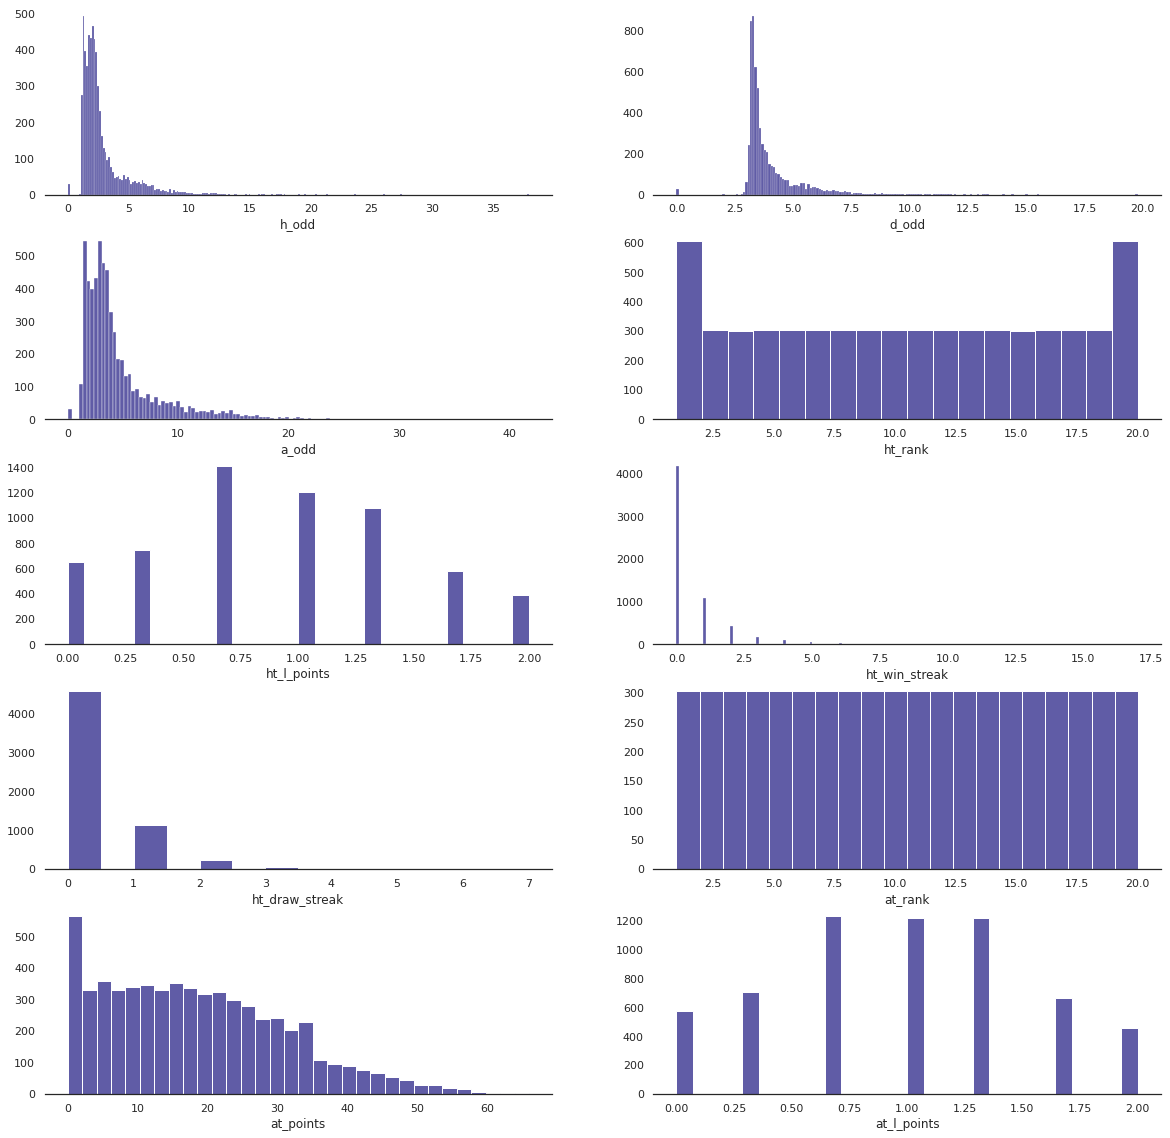

In [9]:
color = sns.color_palette("CMRmap")

sns.set(rc={'figure.figsize':(20,20)}, palette = color, style = 'white')


for i, column in enumerate(model['features'], 1):
    try:
        plt.subplot(5,2,i)
        sns.histplot(df[column]).set(ylabel = None)
        sns.despine(left=True)
    except:
        pass

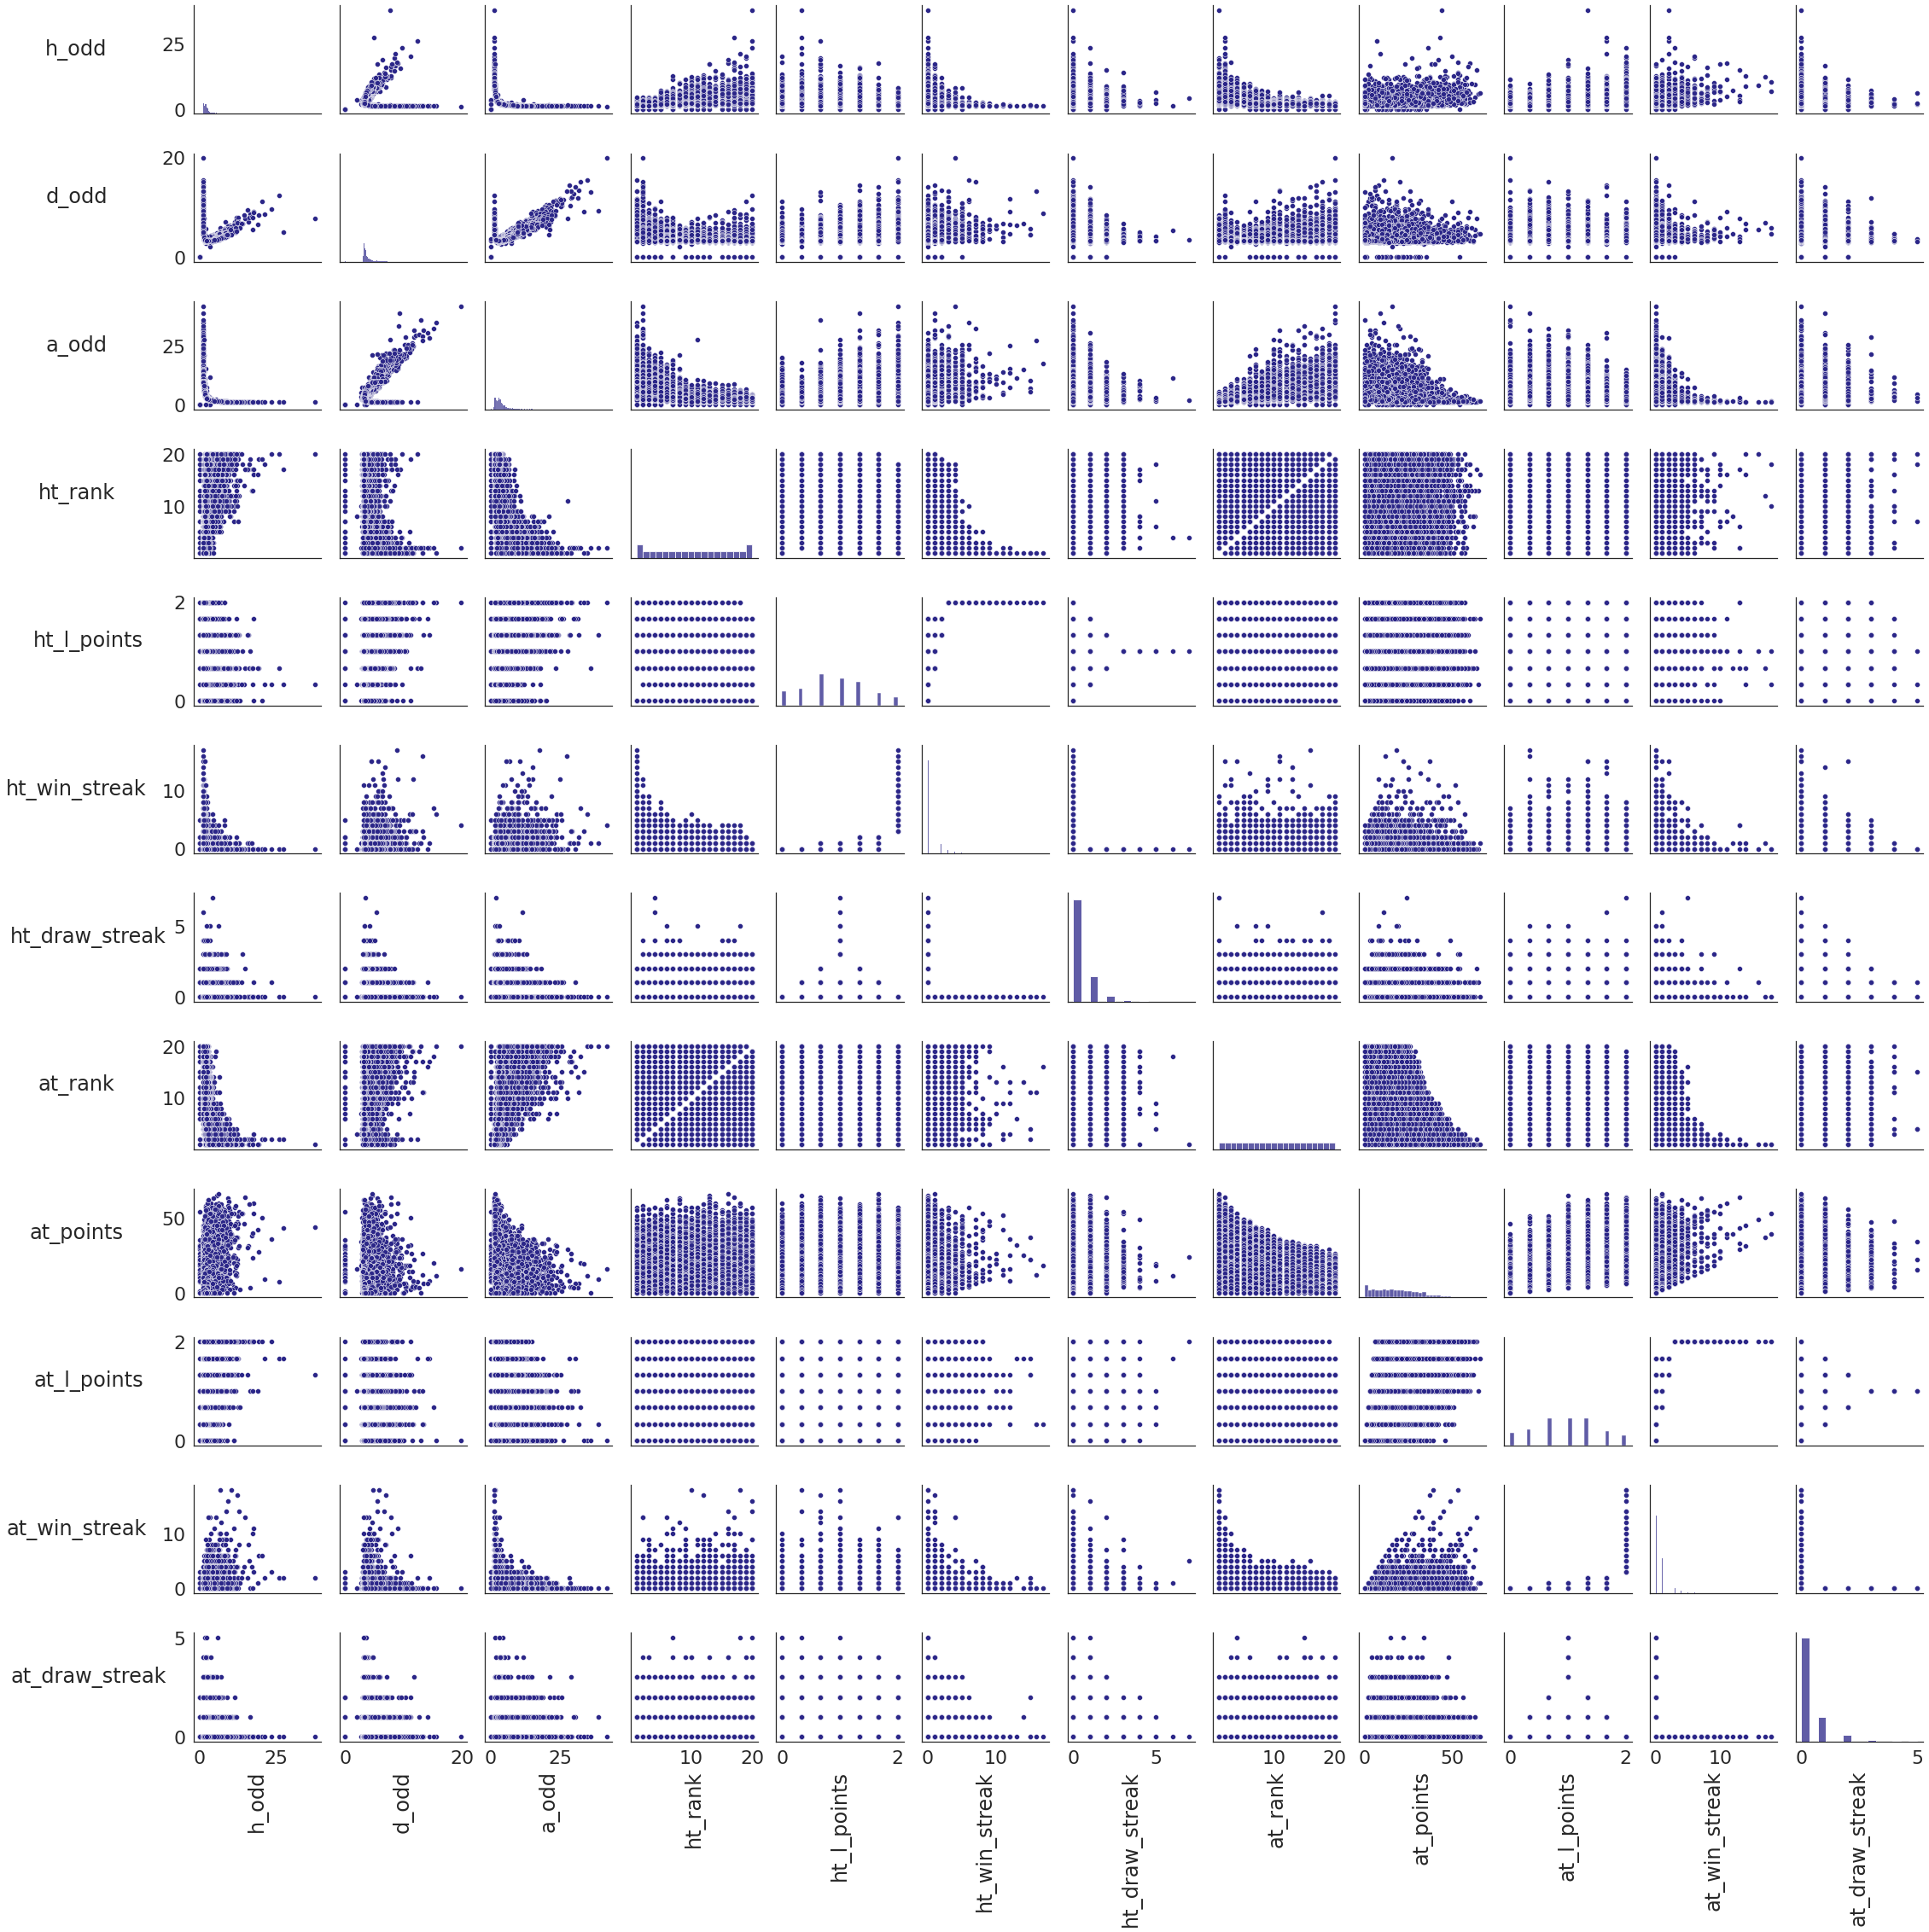

In [12]:
color = sns.color_palette("CMRmap")

sns.set(palette = color, style = 'white', font_scale = 2)

g = sns.pairplot(matches_df[['h_odd', 'd_odd', 'a_odd', 'ht_rank', 'ht_l_points', 'ht_win_streak', 'ht_draw_streak', 'at_rank', 'at_points', 'at_l_points', 'at_win_streak', 'at_draw_streak']])



for ax in g.axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 100 